## Metric: post-correction off-ice errors

See `metric_off-ice-error.ipynb` for more information. Here is an alternative solution when only **V** is available instead of **Vx** and **Vy**.

In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
import gftt
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import numpy as np
import geopandas as gpd

In [3]:
# GIV file (V)
giv_geotiff = '../../data/GIV/Landsat_raw/20180304_20180405.tif'
# off-ice area
in_shp = '../../data/shapefiles/bedrock_V1.shp'

#### FT results with $V$ (GIV input)

The `off_ice_errors` has a different syntax for the input with only $V$ available. (Note the unit of $V$ here is m/year instead of m/day.)

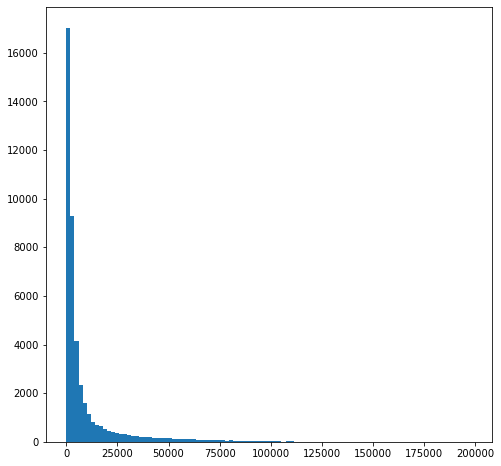

In [4]:
v, bins = gftt.off_ice_errors(vfile=giv_geotiff, off_ice_area=in_shp)

This shows the histogram of velocity $V^2 = V_x^2 + V_y^2$. X-axis is in m$^2$/year$^2$. If we assume 

1. $\overline{V_x} = \overline{V_y} = 0$ (i.e. no biased offset at the off-ice area), and
2. the variance of $V_x$ is the same from the variance of $V_y$ ($\sigma^2 = \sigma_x^2 = \sigma_y^2$),

then theoretically $V^2 / \sigma^2$ follows a Chi-square distribution with a mean value of its degree of freedom, $k = 2$,

$$
\frac{V^2}{\sigma^2} \sim \chi^2(k, 2k).
$$

We can firstly find out $\sigma^2$ from the mean value of $V^2$ divided by the degree of freedom:

$$
\sigma^2 =  \frac{\overline{V^2}}{k}
$$

In [5]:
sigma2 = np.mean(v ** 2) / 2
sigma2   # in m^2/year^2

4688.3508334802345

To test if $V^2 / \sigma^2$ resembles Chi-square, we can calculate the variance of $V^2 / \sigma^2$ divided by the mean value of of $V^2 / \sigma^2$ and see if it is close to 2: 

In [6]:
chi2 = v ** 2 / sigma2

np.var(chi2, ddof=1) / np.mean(chi2)

6.497069177323472

This is a much larger value than 2, which means there are outliers, and $\sigma^2$ is very likely an over-estimate. Again, this is okay as we are conservative about the uncertainty estimate.

Finally, the square root of $\sigma^2$ can be assigned as the overall uncertainty of both on-ice and off-ice pixels (for $V_x$ or $V_y$, not for $V$) and can be directly compared to the results from the previous section. 

In [7]:
print('Vx and Vy std: {:5f}  m/day'.format(np.sqrt(sigma2) / 365.25))

Vx and Vy std: 0.187465  m/day


This gives as a random error on the bedrock of ~0.19 m/day.